# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW11


---
__Name:__  *Jason Sanchez*   
__Class:__ MIDS w261 (Section *Fall 2016 Group 2*, e.g., Summer 2016 Group 1)     
__Email:__  *jason.sanchez*@iSchool.Berkeley.edu     
__Week:__   11


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)

MIDS UC Berkeley, Machine Learning at Scale
DATSCIW261 ASSIGNMENT #11

Version 2016-07-27 (FINAL)


 === INSTRUCTIONS for SUBMISSIONS ===
Follow the instructions for submissions carefully.

https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 

# TYPE-1.5 Fun option: Complete HW11.8 only (no need to complete the rest of the questions)

I am choosing to do the Type 1.5 fun option. Mainly because this will give me more time to perform Spark experiments without focusing on the exact requirements of each HW problem.

<a name="HW11.8"><h2 style="color:darkgreen"> HW11.8 [OPTIONAL] Create an animation of gradient descent for the Perceptron learning or for the logistic regression </h2>
[Back to Table of Contents](#TOC)
    
Learning with the following 3 training examples. Present the progress in terms of the 2 dimensional input space in terms of a contour plot and also in terms of the 3D surface plot. See Live slides for an example.
[Back to Table of Contents](#TOC)
Here is a sample training dataset that can be used:
-2, 3, +1
-1, -1, -1
2, -3, 1

Please feel free to use 
 + R (yes R!)
 + d3
 + https://plot.ly/python/
 + Matplotlib

I am happy for folks to collaborate on HW11.8 also.

It would be great to get the 3D surface and contours lines (with solution region and label normalized data) all in the same graph




I chose to implement the solution for a perceptron.

In this first chart, I show the decision boundary of the solution after each iteration. The darker the line, the higher the iteration count.

In implementing the solution, there were a few design decisions I made:  
* I presumed an intercept term was not allowed (otherwise the problem would be too each considering there would be three features and only three data points to classify. This meant that the decision boundary must pass through the origin.
* A decision boundary that passes throught the origin on this dataset is particularly pernicious because a line that passes through the positive labels passes directly through the origin. This means that how we deal with predictions of exactly 0 is important. To make the problem more difficult, I wrote the code to classify points that fall on the decision boundary as always being incorrect classifications. The effect of this is that the decision boundary never passes through a point, but instead tries to get very, very close to each point.
* The next issue is that we are guaranteed to misclassify one of the two positive points with every iteration. The weights continually decrease in an effort to classify this single point correctly and never converge to a single solution. To solve this issue, I adjusted the gradient to include a term that forces the weights to sum to 1 over time. This forces the algorithm to converge towards a single point.
* Also, I added a decaying learning rate to prevent oscillations. 

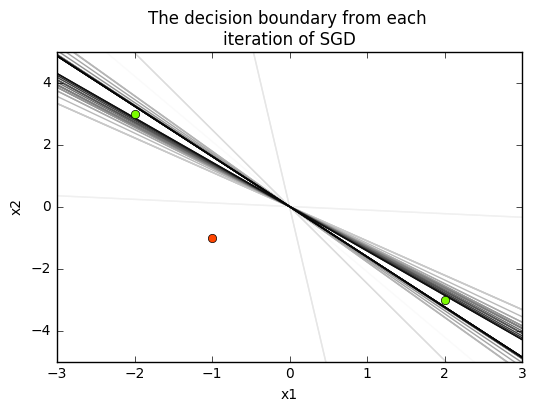

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from random import choice, seed
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from ipywidgets import interact

seed(333)

data = [((-2,  3),  1),
        ((-1, -1), -1),
        (( 2, -3),  1)]

weights = [1, 1]

n_iterations = 101
w1_vals = []
w2_vals = []
data_loss = []

def predict(X, weights, y=None):
    return sum(w*x for w, x in zip(weights, X)) or -y

def error_rate(prediction, y):
    return max(0, -y*prediction)

@np.vectorize
def all_points_error(w1, w2):
    data = [((-2,  3),  1),
        ((-1, -1), -1),
        (( 2, -3),  1)]
    total_error = []
    for X, y in data:
        y_hat = predict(X, (w1, w2), y)
        loss = error_rate(y_hat, y)
        total_error.append(loss)
    average_error = sum(total_error)/len(total_error)
    return average_error

for t in range(n_iterations):
    X, y = choice(data)
    # Predict with current weights. If tie, predict wrong.
    prediction = predict(X, weights, y)
    loss = error_rate(prediction, y)
    if loss:
        for index, x in enumerate(X):
            total_weight = sum(weights) or 1
            bias = (1-total_weight)*(weights[index]/total_weight)
            delta = y*x/(t+1) + bias
            weights[index] += delta
    if t%(n_iterations//50) == 0:
        w1, w2 = weights[0], weights[1]
        w1_vals.append(w1)
        w2_vals.append(w2)
        data_loss.append(all_points_error(w1, w2))
        
plt.figure()
for index, (w1, w2) in enumerate(zip(w1_vals, w2_vals)):
    x1 = list(range(-3,4))
    x2 = [-w1/w2*x for x in x1]
    plt.plot(x1, x2, color="%f" % (1-index/len(w1_vals)))
plt.plot(-2, 3, "o", color="LawnGreen")
plt.plot(-1, -1, "o", color="OrangeRed")
plt.plot(2, -3, "o", color="LawnGreen")
plt.title("The decision boundary from each \niteration of SGD")
plt.xlabel("x1")
plt.ylabel("x2")
plt.ylim(-5,5)
plt.show()

This code demonstrates that the sum of the weights approach one over time.

In [2]:
[sum(total_weight) for total_weight in zip(w1_vals, w2_vals)]

[-0.2142857142857144,
 2.0650441518460436,
 1.7169103689261154,
 1.7169103689261154,
 0.7312983037479666,
 0.7312983037479666,
 1.0673822587223123,
 1.0673822587223123,
 1.1180876498808339,
 1.1180876498808339,
 1.1180876498808339,
 1.1180876498808339,
 0.9494781872704072,
 0.9494781872704072,
 1.0510890424353243,
 0.950301752291886,
 1.0432275310405712,
 1.0432275310405712,
 0.9604745056017685,
 1.035943177497436,
 1.035943177497436,
 1.035943177497436,
 0.9677563875765219,
 1.030107184823184,
 1.030107184823184,
 1.030107184823184,
 1.030107184823184,
 0.9732447813415748,
 0.9732447813415748,
 1.0243435880581493,
 0.9758710309609366,
 0.9758710309609366,
 1.0216457599432598,
 1.0216457599432598,
 1.0216457599432598,
 0.9791495034306519,
 0.9791495034306519,
 0.9791495034306519,
 1.0181609849994757,
 0.9813639159529808,
 0.9818740380887245,
 0.9818740380887245,
 1.0168554820916589,
 0.9832205292190515,
 0.9832205292190515,
 0.9832205292190515,
 0.9832205292190515,
 1.0149128120401925,

Next, here is a 3D surface chart that you can move using the sliders. 

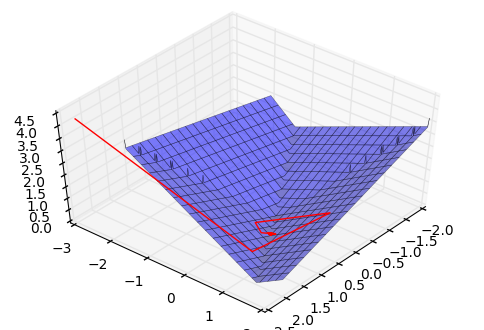

In [3]:
def convex_plot(azim, elev):
    fig = plt.figure()
    ax = fig.gca(projection="3d")

    x1mesh, x2mesh = np.mgrid[-2:2:200j,-2:2:200j]
    fmesh = all_points_error(x1mesh, x2mesh)
    ax.plot_surface(x1mesh, x2mesh, fmesh, alpha=.5, linewidth=0.35)
    ax.view_init(azim=azim, elev=elev)

    ax.plot3D(w1_vals, w2_vals, data_loss, color="r")
    plt.show()
    
interact(convex_plot, azim=(0,90,10), elev=(0,90,10))

And here is a contour plot. I plotted the contour of the original loss function so you could see the valley that the optimization routine would chase as well as the clear convergence of the algorithm.

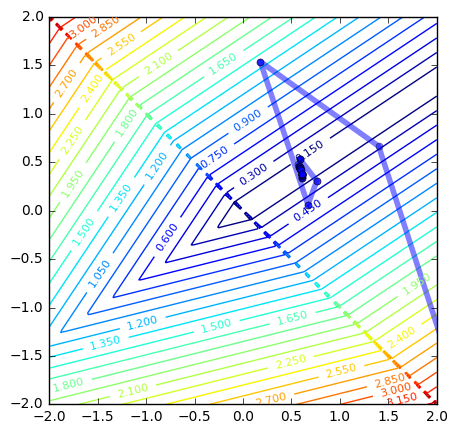

In [4]:
fig = plt.figure(figsize=(5,5))
plt.axis("equal")
x1mesh, x2mesh = np.mgrid[-2:2:200j,-2:2:200j]
fmesh = all_points_error(x1mesh, x2mesh)
CS = plt.contour(x1mesh, x2mesh, fmesh, 30)
plt.plot(w1_vals, w2_vals, "o-", markersize=5, linewidth=4, alpha=.5)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.clabel(CS, inline=1, inline_spacing=5, fontsize=8)

plt.show()